In [1]:
import cv2
from PIL import Image
import numpy as np
import json

In [2]:
image_name = "00048_00"

img = cv2.imread(f"./zalando-hd-resized/train/image/{image_name}.jpg")[:,:,::-1]
img_agnostic_parse_map = cv2.imread(f"./zalando-hd-resized/train/image-parse-agnostic-v3.2/{image_name}.png")[:,:,::-1]
img_parse_map = cv2.imread(f"./zalando-hd-resized/train/image-parse-v3/{image_name}.png")[:,:,::-1]
img_pose = cv2.imread(f"./zalando-hd-resized/train/openpose_img/{image_name}_rendered.png")[:,:,::-1]
with open(f"./zalando-hd-resized/train/openpose_json/{image_name}_keypoints.json", "r") as f:
    img_pose_json = json.load(f)

## Generating RGB agnostic Image Ia

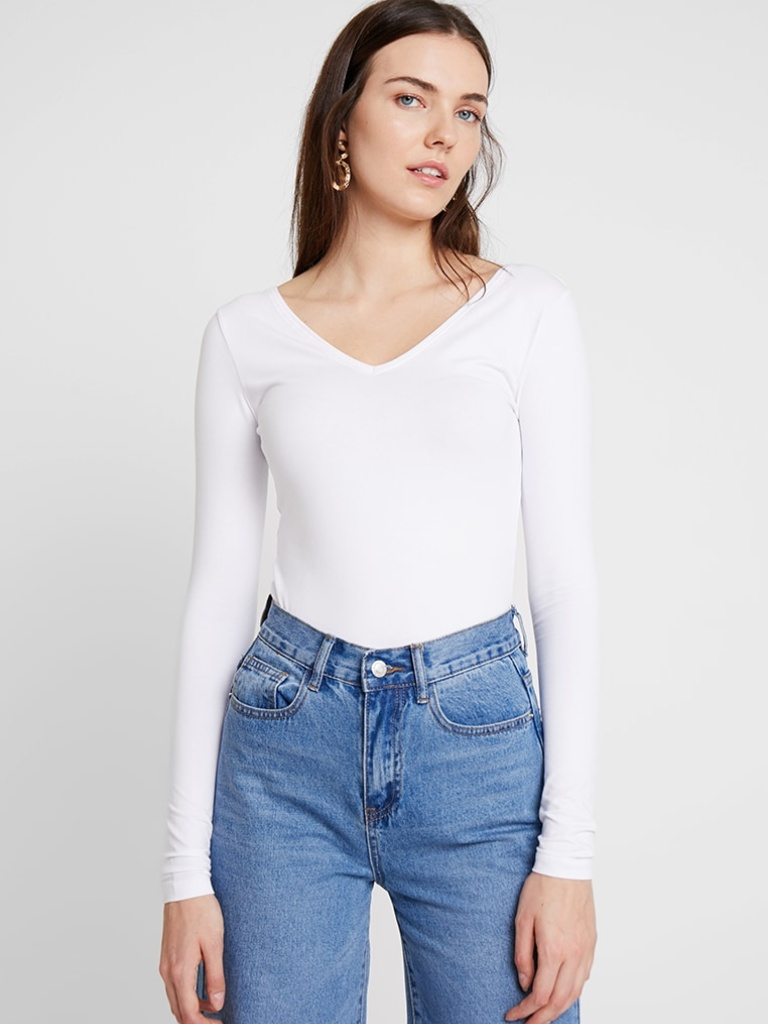

In [3]:
Image.fromarray(img)

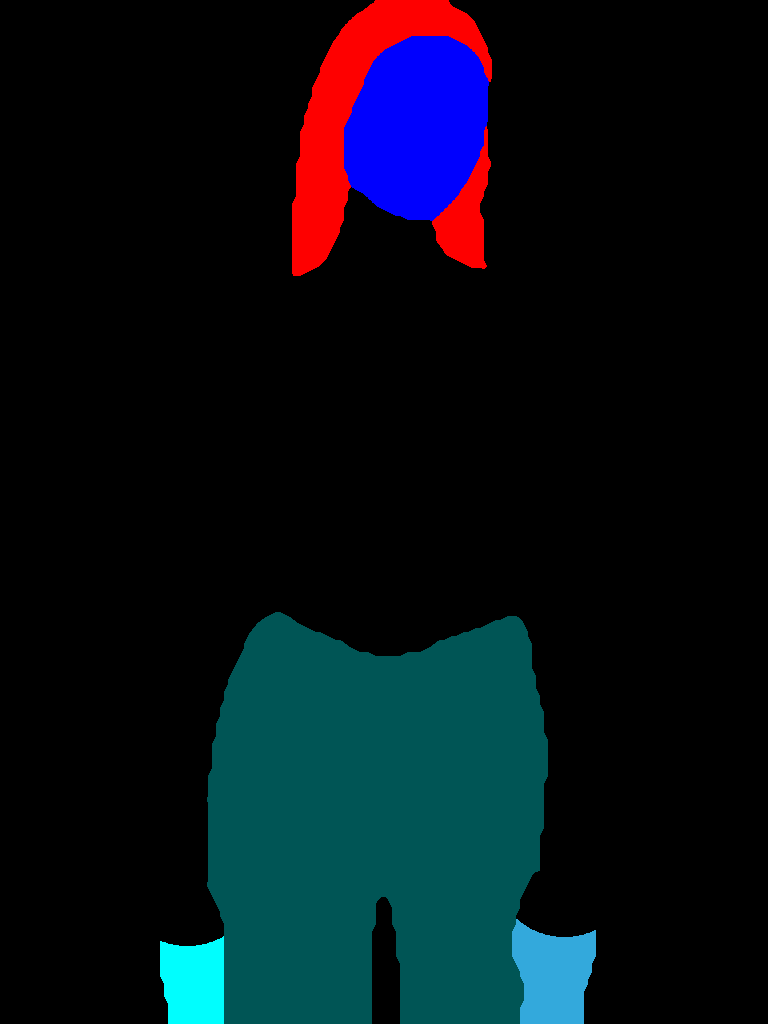

In [4]:
Image.fromarray(img_agnostic_parse_map)

In [5]:
def generate_rgb_agnostic(img, img_agnostic_parse_map):
    sum_img_agnostic_parse_map = np.sum(img_agnostic_parse_map, axis = 2)
    sum_img_agnostic_parse_map[sum_img_agnostic_parse_map!=0] = 1
    img_rgb_agnostic = (sum_img_agnostic_parse_map.reshape(*sum_img_agnostic_parse_map.shape,1)*img).astype(np.uint8)
    return img_rgb_agnostic

In [6]:
rgb_agnostic = generate_rgb_agnostic(img, img_agnostic_parse_map)

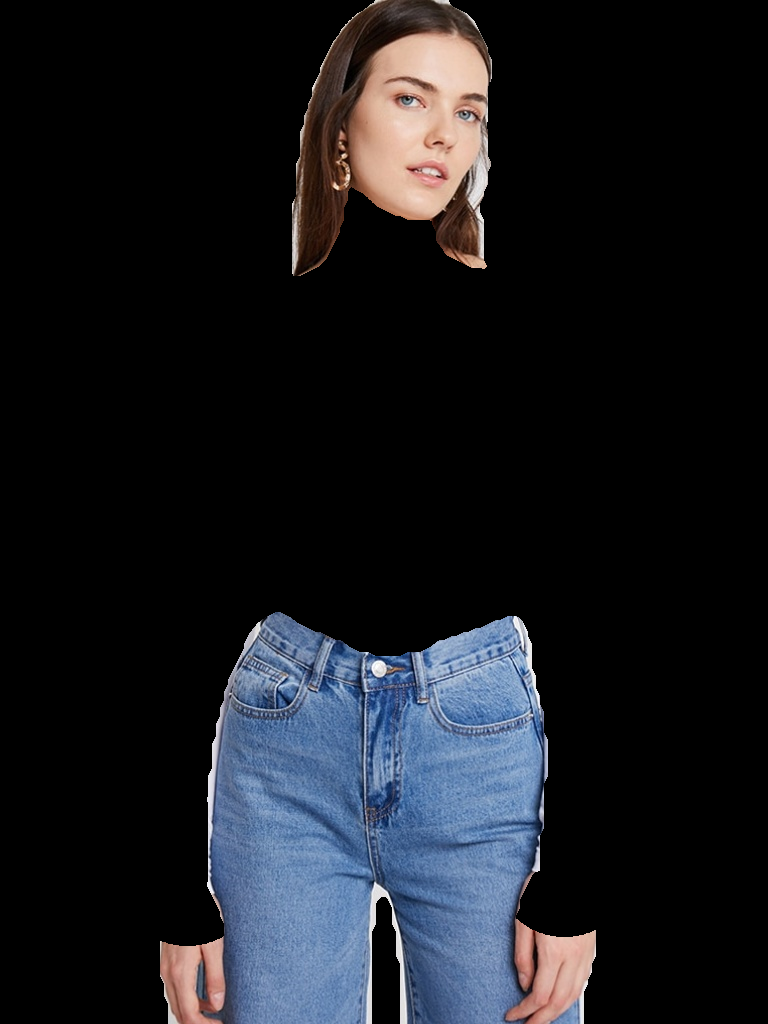

In [7]:
Image.fromarray(rgb_agnostic)

## Generating Garment Segment Ic

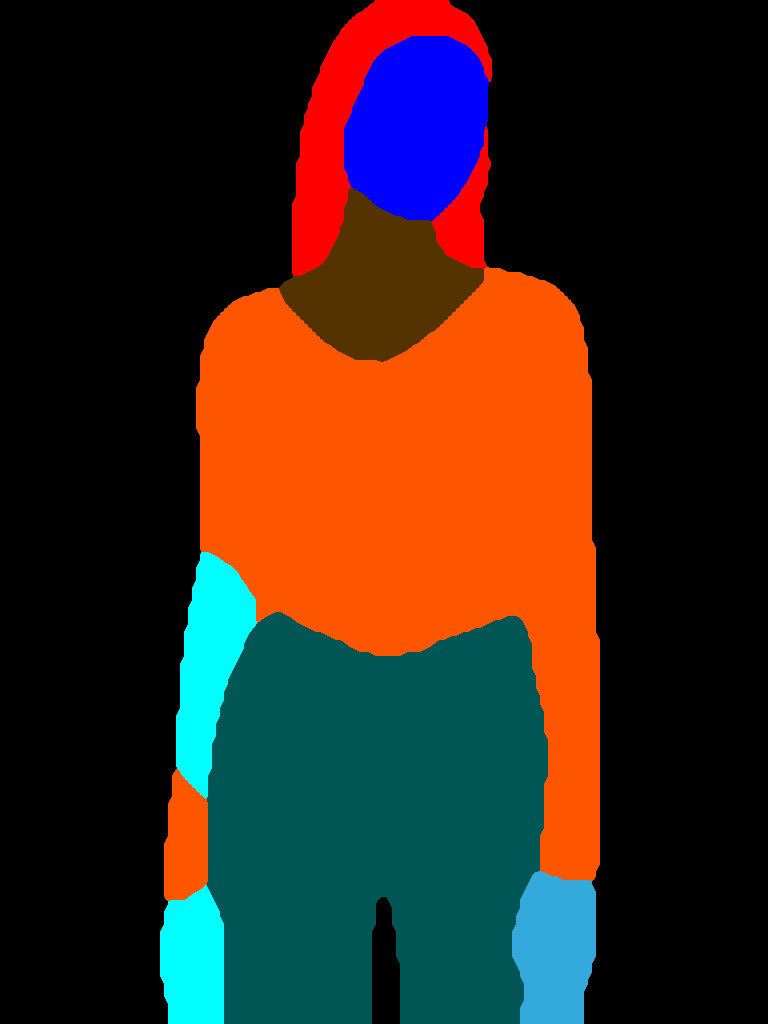

In [8]:
Image.fromarray(img_parse_map)

In [9]:
uq, count = np.unique(img_parse_map.reshape(-1, img_parse_map.shape[2]), axis=0, return_counts=True)

In [10]:
uq

array([[  0,   0,   0],
       [  0,   0, 254],
       [  0,  85,  85],
       [  0, 254, 254],
       [ 51, 169, 220],
       [ 85,  51,   0],
       [254,   0,   0],
       [254,  85,   0]], dtype=uint8)

In [11]:
np.sum(uq, axis=1)

array([  0, 254, 170, 508, 440, 136, 254, 339], dtype=uint64)

In [12]:
count

array([437043,  20777, 119175,  18667,  10652,  19429,  19692, 140997])

In [13]:
# color of top garment is [254, 85, 0]

In [14]:
def get_upper_garment(img, img_parse_map):
    sum_img_parse_map = np.sum(img_parse_map, axis = 2)
    sum_img_parse_map[sum_img_parse_map!=339] = 0
    sum_img_parse_map[sum_img_parse_map==339] = 1
    upper_garment_segment = (sum_img_parse_map.reshape(*sum_img_parse_map.shape,1)*img).astype(np.uint8)
    return upper_garment_segment

In [15]:
img_upper_garment = get_upper_garment(img, img_parse_map)

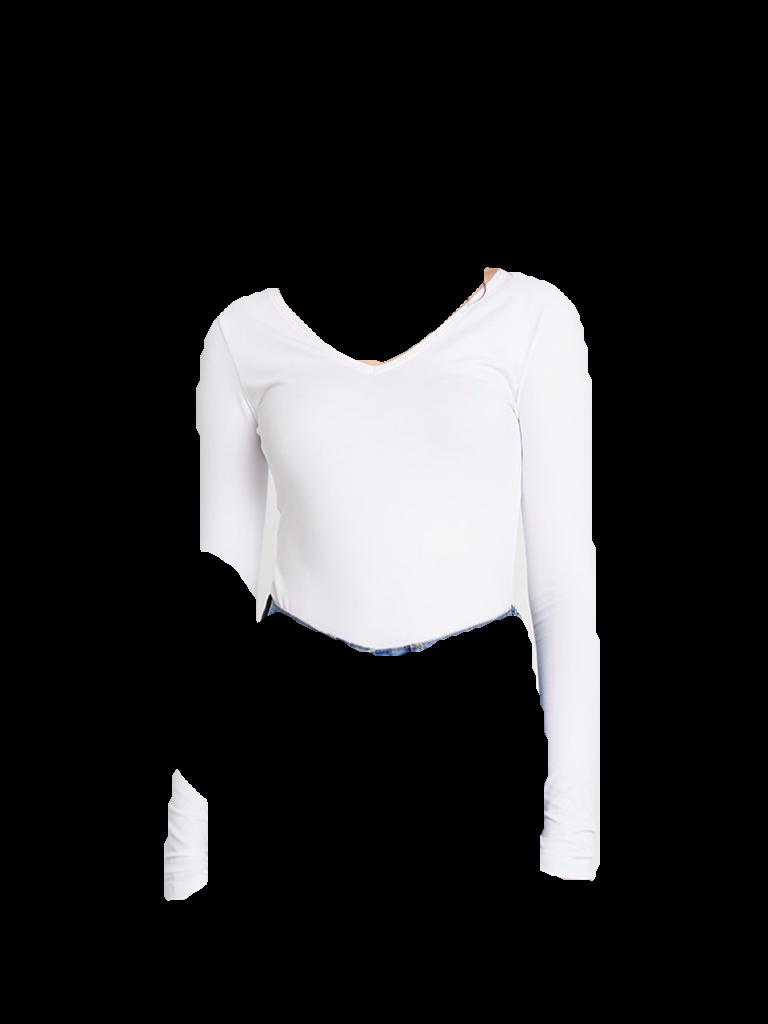

In [16]:
Image.fromarray(img_upper_garment)